<a href="https://colab.research.google.com/github/anc-22/Retail_Analytics_Project/blob/main/Retail_Analytics_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from scipy import stats

# **Part 1: Descriptive Analytics**

# Data Inspection and Cleaning

### Importing the 'Customers' dataset

In [ ]:
customers_df = pd.read_excel("customers.xlsx")
customers_df

,customer.id,customer.state,age,birthday.month,years.as.member,in.store.exp,selection
0,C40000,MA,31,10,0,NaN,NaN
1,C40001,MA,27,2,0,NaN,NaN
2,C40002,MA,33,3,0,NaN,NaN
3,C40003,VT,35,8,1,NaN,NaN
4,C40004,MA,26,6,0,NaN,NaN
...,...,...,...,...,...,...,...
2496,C42496,VT,26,5,4,5 Very Satisfied,4 Somewhat Satisfied
2497,C42497,MA,47,4,0,NaN,NaN
2498,C42498,MA,38,8,0,NaN,NaN
2499,C42499,MA,27,8,1,NaN,NaN


In [ ]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2501 entries, 0 to 2500
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customer.id      2501 non-null   object
 1   customer.state   2501 non-null   object
 2   age              2501 non-null   int64 
 3   birthday.month   2501 non-null   object
 4   years.as.member  2501 non-null   int64 
 5   in.store.exp     547 non-null    object
 6   selection        547 non-null    object
dtypes: int64(2), object(5)
memory usage: 136.9+ KB


In [ ]:
cols = customers_df.columns

# for each column
for col in cols:
    print(col)

    # get a list of unique values
    unique = customers_df[col].unique()
    print(unique, '\n====================================\n\n')

customer.id
['C40000' 'C40001' 'C40002' ... 'C42498' 'C42499' 'C42500'] 


customer.state
['MA' 'VT' 'RI' 'CT' 'NY' 'CA' 'TX' 'Mass.' 'Massachusetts' 'Connecticut'
 'Massachusets' 'Mass' 'Conn.' 'Massachusetts '] 


age
[31 27 33 35 26 73 70 29 69 43 22 28 24 45 39 72 34 36 55 49 40 37 53 74
 38 25 30 44 42 66 23 50 71 59 41 68 62 64 65 32 46 60 75 57 51 54 47 56
 52 58 63 48 67  0 61] 


birthday.month
[10 2 3 8 6 7 1 11 4 5 12 9 'October' 0 'March' 'Mar' 'February' 'Apr.'
 'Feb.' 'April' 'Nov.' 'July' 'Oct'] 


years.as.member
[0 1 5 3 2 4] 


in.store.exp
[nan '4 Somewhat Satisfied' '5 Very Satisfied' '3 Neutral'
 '2 Somewhat Unsatisfied' '1 Very Unsatisfied'] 


selection
[nan '5 Very Satisfied' '4 Somewhat Satisfied' '3 Neutral'
 '2 Somewhat Unsatisfied' '1 Very Unsatisfied'] 




## Identify problematic data
1. **customer.state** has multiple state values with different format and mistype: [MA' 'VT' 'RI' 'CT' 'NY' 'CA' 'TX' 'Mass.' 'Massachusetts' 'Connecticut' 'Massachusets' 'Mass' 'Conn.' 'Massachusetts]
Needs to be change to two-letter U.S. state abbreviation codes

2. **birthday.month** are store in numerical and categorical code: [10 2 3 8 6 7 1 11 4 5 12 9 'October' 0 'March' 'Mar' 'February' 'Apr.' 'Feb.' 'April' 'Nov.' 'July' 'Oct']
Needs to be stored as numerical code only (1-2)

3. Missing data in **in.store.exp** and **selection** are acceptable.

4. Missing values in **birthday.month** are not acceptable and will be replace with mode values.

5. 0 values in **year.as.member** are acceptable as it indicates that the customer joined less than 1 year.

6. 0 values in **age** do not reflect the years calculated from birthday used to register the account, hence will be replaced with median values.

7. There are no duplicate data.

## Cleaning Problematic Categorical Data

In [ ]:
# Clean and standardize customer.state
customers_df['customer.state'] = customers_df['customer.state'].str.strip().str.upper()
customers_df['customer.state'] = customers_df['customer.state'].replace(['MASS.','MASSACHUSETTS','MASSACHUSETS','MASS'], 'MA')
customers_df['customer.state'] = customers_df['customer.state'].replace(['CONNECTICUT','CONN.'], 'CT')

In [ ]:
# Mapping of month names and abbreviations to their numeric values
month_mapping = {
    'JANUARY': 1, 'JAN': 1,
    'FEBRUARY': 2, 'FEB': 2,
    'MARCH': 3, 'MAR': 3,
    'APRIL': 4, 'APR': 4,
    'MAY': 5,
    'JUNE': 6, 'JUN': 6,
    'JULY': 7, 'JUL': 7,
    'AUGUST': 8, 'AUG': 8,
    'SEPTEMBER': 9, 'SEP': 9, 'SEPT': 9,
    'OCTOBER': 10, 'OCT': 10,
    'NOVEMBER': 11, 'NOV': 11,
    'DECEMBER': 12, 'DEC': 12}
# Apply the cleaning using a lambda function
customers_df['birthday.month'] = customers_df['birthday.month'].apply(
    lambda x: x if isinstance(x, (int)) and 1 <= x <= 12
    else month_mapping.get(x.strip('.').upper(), np.nan) if isinstance(x, str)
    else np.nan)
#Replace NaN values with mode values:
customers_df['birthday.month'] = customers_df['birthday.month'].fillna(customers_df['birthday.month'].mode()[0])
#Converting to String Dtype:
customers_df['birthday.month'] = customers_df['birthday.month'].astype('Int64') #first converting to integer to remove floating
customers_df['birthday.month'] = customers_df['birthday.month'].astype('string')
customers_df['birthday.month'].unique()

<StringArray>
['10', '2', '3', '8', '6', '7', '1', '11', '4', '5', '12', '9']
Length: 12, dtype: string

In [ ]:
# check the columns to check

cols = customers_df.columns


for col in cols:
    print(col)

    # get a list of unique values
    unique = customers_df[col].unique()
    print(unique, '\n====================================\n\n')

customer.id
['C40000' 'C40001' 'C40002' ... 'C42498' 'C42499' 'C42500'] 


customer.state
['MA' 'VT' 'RI' 'CT' 'NY' 'CA' 'TX'] 


age
[31 27 33 35 26 73 70 29 69 43 22 28 24 45 39 72 34 36 55 49 40 37 53 74
 38 25 30 44 42 66 23 50 71 59 41 68 62 64 65 32 46 60 75 57 51 54 47 56
 52 58 63 48 67  0 61] 


birthday.month
<StringArray>
['10', '2', '3', '8', '6', '7', '1', '11', '4', '5', '12', '9']
Length: 12, dtype: string 


years.as.member
[0 1 5 3 2 4] 


in.store.exp
[nan '4 Somewhat Satisfied' '5 Very Satisfied' '3 Neutral'
 '2 Somewhat Unsatisfied' '1 Very Unsatisfied'] 


selection
[nan '5 Very Satisfied' '4 Somewhat Satisfied' '3 Neutral'
 '2 Somewhat Unsatisfied' '1 Very Unsatisfied'] 




## Cleaning Problematic Numerical Data

In [ ]:
customers_df['age'].describe()

,age
count,2501.000000
mean,39.249500
std,14.251741
min,0.000000
25%,28.000000
50%,35.000000
75%,46.000000
max,75.000000


In [ ]:
# Replace value 0 with median age (due to outliers in the dataset):
customers_df['age'] = customers_df['age'].replace(0, customers_df['age'].median())

In [ ]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2501 entries, 0 to 2500
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customer.id      2501 non-null   object
 1   customer.state   2501 non-null   object
 2   age              2501 non-null   int64 
 3   birthday.month   2501 non-null   string
 4   years.as.member  2501 non-null   int64 
 5   in.store.exp     547 non-null    object
 6   selection        547 non-null    object
dtypes: int64(2), object(4), string(1)
memory usage: 136.9+ KB


# Data Manipulation & Wrangling

In [ ]:
#Import sales dataset
sales_df = pd.read_excel("sales.xlsx", sheet_name=1)
sales_df

,store,sale.date,tran.number,sku,category,qty,unit.cost,ext.cost,unit.original.retail,sale.amount,price.category,gross.margin,loyalty.member,customer.id
0,12,2023-02-25,11386,2918736,Footwear,1,33.39,33.39,144.0,59.94,Clearance,0.442943,0,NaN
1,12,2023-02-25,11387,2923953,Footwear,1,42.69,42.69,174.0,75.00,Full Price,0.430800,0,NaN
2,12,2023-02-25,11388,2923954,Footwear,1,42.69,42.69,174.0,75.00,Full Price,0.430800,0,NaN
3,12,2023-02-25,11395,2927232,Women's Apparel,1,22.39,22.39,99.0,56.25,Full Price,0.601956,0,NaN
4,12,2023-02-25,11398,2927233,Women's Apparel,1,22.39,22.39,99.0,56.25,Full Price,0.601956,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10167,12,2023-12-24,96080,2965082,Gifts & Lifestyle,1,11.67,11.67,48.0,43.20,Full Price,0.729861,1,C42232
10168,12,2023-12-24,96085,2936524,Women's Apparel,1,22.50,22.50,99.0,22.46,Clearance,-0.001781,1,C42232
10169,12,2023-12-24,96086,2936524,Women's Apparel,1,22.50,22.50,99.0,18.38,Clearance,-0.224157,0,NaN
10170,12,2023-12-24,96087,2964928,Footwear,2,37.83,75.66,162.0,139.89,Clearance,0.459146,0,NaN


In [ ]:
print(sales_df.columns)

Index(['store', 'sale.date', 'tran.number', 'sku', 'category', 'qty',
       'unit.cost', 'ext.cost', 'unit.original.retail', 'sale.amount',
       'price.category', 'gross.margin', 'loyalty.member', 'customer.id'],
      dtype='object')


In [ ]:
sales_df['gross.margin'].describe()

,gross.margin
count,10172.000000
mean,0.480926
std,0.487030
min,-4.117647
25%,0.447074
50%,0.665067
75%,0.727853
max,0.835833


## Customer-Level Transactions

In [ ]:
#Filter customers with ids
customers_wids = sales_df[sales_df['customer.id'].notna()]

In [ ]:
# Aggregate sales data based on customer id
customer_sales = customers_wids.groupby('customer.id').agg(total_qty=pd.NamedAgg(column='qty', aggfunc='sum'),
    avg_sale_amount=pd.NamedAgg(column='sale.amount', aggfunc=lambda x: (x / customers_wids.loc[x.index, 'qty']).mean().round(2))
).reset_index()

In [ ]:
customer_sales

,customer.id,total_qty,avg_sale_amount
0,C40000,4,79.71
1,C40002,5,65.97
2,C40003,2,41.84
3,C40004,1,56.25
4,C40005,2,16.38
...,...,...,...
1235,C42488,5,42.45
1236,C42490,3,50.19
1237,C42492,2,109.50
1238,C42493,4,30.82


In [ ]:
#Merging customer_sales with customers_df (including all non-purchasers)
customer_purchases = pd.merge(customer_sales, customers_df, on='customer.id', how='right')

In [ ]:
customer_purchases

,customer.id,total_qty,avg_sale_amount,customer.state,age,birthday.month,years.as.member,in.store.exp,selection
0,C40000,4.0,79.71,MA,31,10,0,NaN,NaN
1,C40001,NaN,NaN,MA,27,2,0,NaN,NaN
2,C40002,5.0,65.97,MA,33,3,0,NaN,NaN
3,C40003,2.0,41.84,VT,35,8,1,NaN,NaN
4,C40004,1.0,56.25,MA,26,6,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2496,C42496,5.0,34.91,VT,26,5,4,5 Very Satisfied,4 Somewhat Satisfied
2497,C42497,NaN,NaN,MA,47,4,0,NaN,NaN
2498,C42498,NaN,NaN,MA,38,8,0,NaN,NaN
2499,C42499,NaN,NaN,MA,27,8,1,NaN,NaN


In [ ]:
#Merging customer_sales with customers_df (not including all non-purchasers)
# customer_purchases = pd.merge(customer_sales, customers_df, on='customer.id', how='left')

In [ ]:
customer_purchases.to_excel('customer_purchases.xlsx')

# Summary Statistics & Visualization

## Sale Amount Statistics

In [ ]:
sales_df['sale.amount'].describe()

,sale.amount
count,10172.000000
mean,60.599306
std,36.261997
min,1.870000
25%,30.830000
50%,56.200000
75%,88.035000
max,693.000000


### Finding Sknewness

In [ ]:
skewness = skew(sales_df['sale.amount'].dropna())
skewness

1.0058760878690447

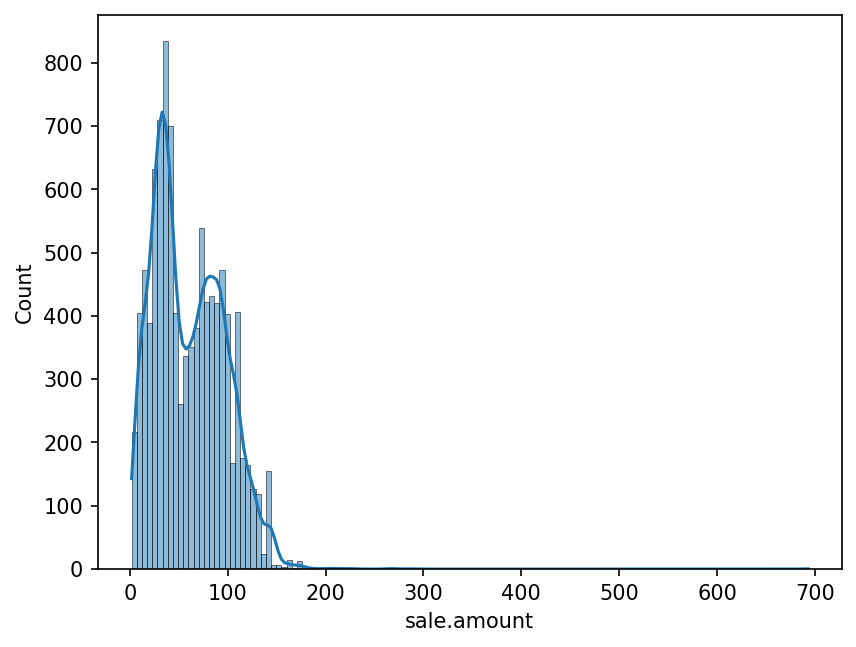

In [ ]:
plt.figure(dpi=150)
sns.histplot(sales_df['sale.amount'], kde=True)
plt.show()

## Creating Boxplots

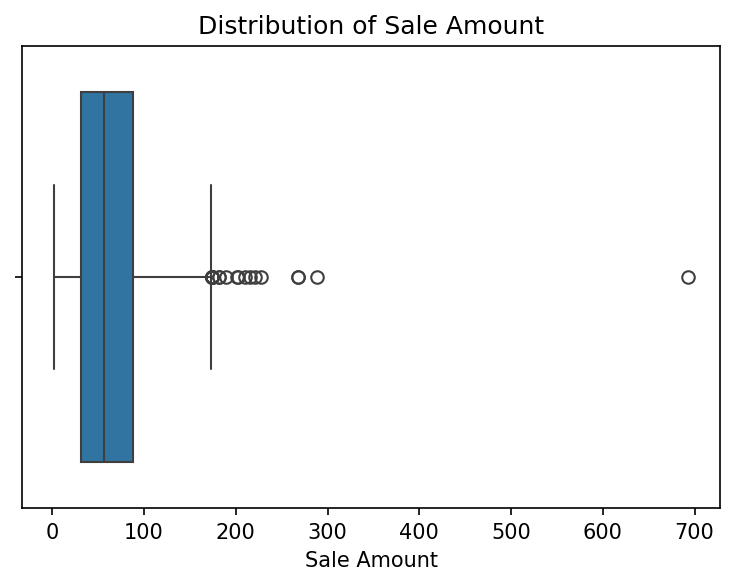

In [ ]:
#Creating Boxplot for overall sale amount
plt.figure(figsize=(6,4), dpi=150)
plt.title('Distribution of Sale Amount')

with sns.axes_style("whitegrid"):
    sns.boxplot(data=sales_df,
                x='sale.amount',
               )
plt.xlabel('Sale Amount')
plt.show()

<ipython-input-24-900669a94f06>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sales_df,


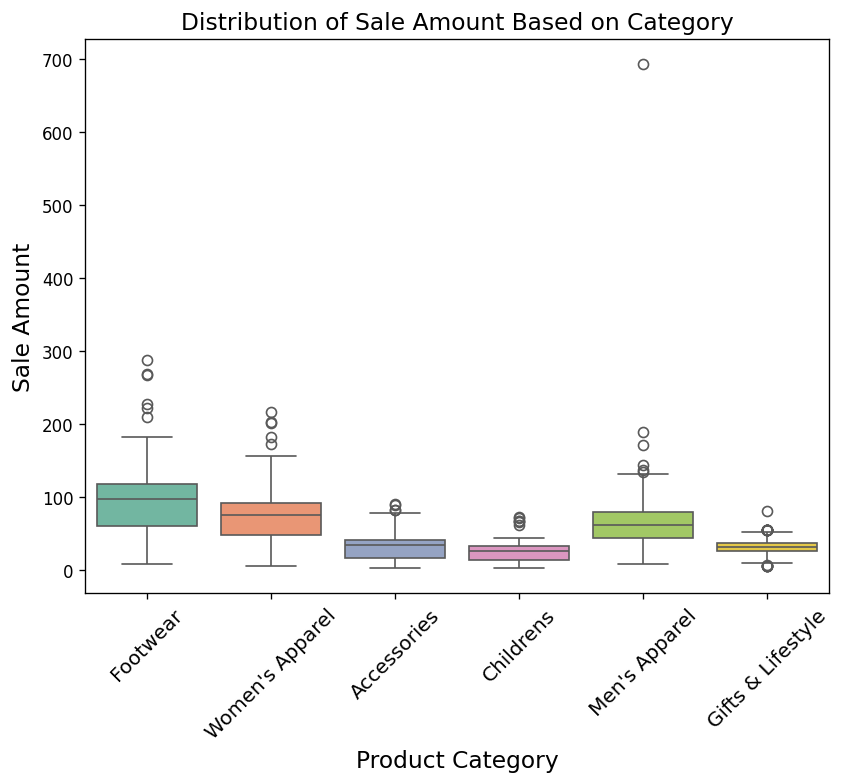

In [ ]:
#Creating Boxplot for sale amount in each category
plt.figure(figsize=(8,6), dpi=120)
plt.xticks(fontsize=12, rotation=45)
plt.title('Distribution of Sale Amount Based on Category', fontsize=14)
with sns.axes_style("whitegrid"):
    sns.boxplot(data=sales_df,
                x='category',
                y='sale.amount',
                palette='Set2'
               )
plt.xlabel('Product Category',fontsize=14)
plt.ylabel('Sale Amount', fontsize=14)
plt.show()

## Calculating Blended Gross Margin

In [ ]:
#Calculate Blended Gross Margin
category_gm = sales_df.groupby('category').agg(total_sale_amount= pd.NamedAgg(column='sale.amount', aggfunc='sum'),total_ext_cost=pd.NamedAgg(column='ext.cost',aggfunc='sum'))

In [ ]:
category_gm['blended_gm'] = (category_gm['total_sale_amount'] - category_gm['total_ext_cost']) / category_gm['total_sale_amount']
category_gm

,total_sale_amount,total_ext_cost,blended_gm
category,,,
Accessories,45033.53,16930.06,0.624057
Childrens,27191.00,10036.94,0.630873
Footwear,204102.96,74701.97,0.633999
Gifts & Lifestyle,9967.50,4213.47,0.577279
Men's Apparel,103846.60,35795.64,0.655303
Women's Apparel,226274.55,83021.90,0.633092


In [ ]:
# Total blended gross margin as a weighted average
total_blended_gross_margin = (
    (category_gm['blended_gm'] * category_gm['total_sale_amount']).sum()
    / category_gm['total_sale_amount'].sum()
)

print(f"Total Blended Gross Margin: {total_blended_gross_margin:.4f}")

Total Blended Gross Margin: 0.6355


## Detecting Outliers

In [ ]:
#Detecting outliers using z-score method:

def detect_outliers(sales_df):
    outlier_count = 0
    total_records = len(sales_df)
    for (index, row) in sales_df.iterrows():
        z_score = (row['sale.amount'] - sales_df['sale.amount'].mean()) / sales_df['sale.amount'].std()
        if z_score > 3 or z_score < -3:
            print(f'Z-Score of Outlier: {z_score}')
            outlier_count += 1
        else:
            pass
    outlier_percentage = round(((outlier_count / total_records) * 100), 2) if total_records > 0 else 0
    return f"Number of Outliers: {outlier_count} | Percentage of Outliers: {outlier_percentage}%"

detect_outliers(sales_df)


Z-Score of Outlier: 3.3340881045744526
Z-Score of Outlier: 3.094167509123684
Z-Score of Outlier: 3.094167509123684
Z-Score of Outlier: 3.127260005047928
Z-Score of Outlier: 3.127260005047928
Z-Score of Outlier: 3.127260005047928
Z-Score of Outlier: 3.127260005047928
Z-Score of Outlier: 17.439764492283427
Z-Score of Outlier: 4.285497362396465
Z-Score of Outlier: 3.093340196725578
Z-Score of Outlier: 3.5409162041009767
Z-Score of Outlier: 4.611458447250268
Z-Score of Outlier: 4.426140470074502
Z-Score of Outlier: 3.127260005047928
Z-Score of Outlier: 3.0583173052057533
Z-Score of Outlier: 3.127260005047928
Z-Score of Outlier: 3.354770914527105
Z-Score of Outlier: 3.127260005047928
Z-Score of Outlier: 3.8883874113055383
Z-Score of Outlier: 3.127260005047928
Z-Score of Outlier: 6.271047117851101
Z-Score of Outlier: 3.9132067832487207
Z-Score of Outlier: 5.710129311935167
Z-Score of Outlier: 4.120034882775245
Z-Score of Outlier: 5.701028875555998


'Number of Outliers: 25 | Percentage of Outliers: 0.25%'

### Recommendation For Handling Outliers

Since there is less than 1% of outliers presented in the sales dataframe, it can be handled as follows:
1. There is one extreme value in 'sale.amount' (693) with a 'z-score' of 17.4. Given the original unit cost of 77 with quantity of 10, this value seems to be input incorrectly. It can be removed from the dataset given its rare frequency to prevent skewed statistical measures. Alternatively, this transaction can be capped as upper bound level to maintain data integrity given its bulk purchases nature.
2. For other outliers within a z-score of 3 to 6, they fall within the 'Footware', "Men's Apparel", "Women's Apparel". These categories might have products at a higher price range, making the 'sale.amount' becomes more extreme than the average 61 from other categories like "Children" or "Accessories". Therefore, it is recommended to cap these outliers at upper bound level to maintain data integrity.

# Current Business Challenges

Business performance, as measured by gross margin percentage (GM'%') and gross margin dollars (GM'dollar'), has been inconsistent.

*   When GM% is low relative to the company's average, it indicates that items were discounted more than usual (likely because they were slow to sell).
*   There appears to be variation in performance across stores and across product categories, making it hard to determine the root causes of low GM%
*   Note: GM'dollar' reflects both GM% and volume; a store of category might have high GM% but low GM'dollar' or vice versa. GM% is the firm’s primary performance metric, but it's important to keep in mind the size (in GM'dollar') of each store and category when making recommendations.

Forecasting future GM$ has been a challenge because of seasonality and other variation in the data.
* The retailer knows that business is seasonal, but the underlying trends in
financial performance and the degree of variation across stores in the seasonal patterns is not well understood.

# Data Exploration

### Sales Trend by Store Across Months

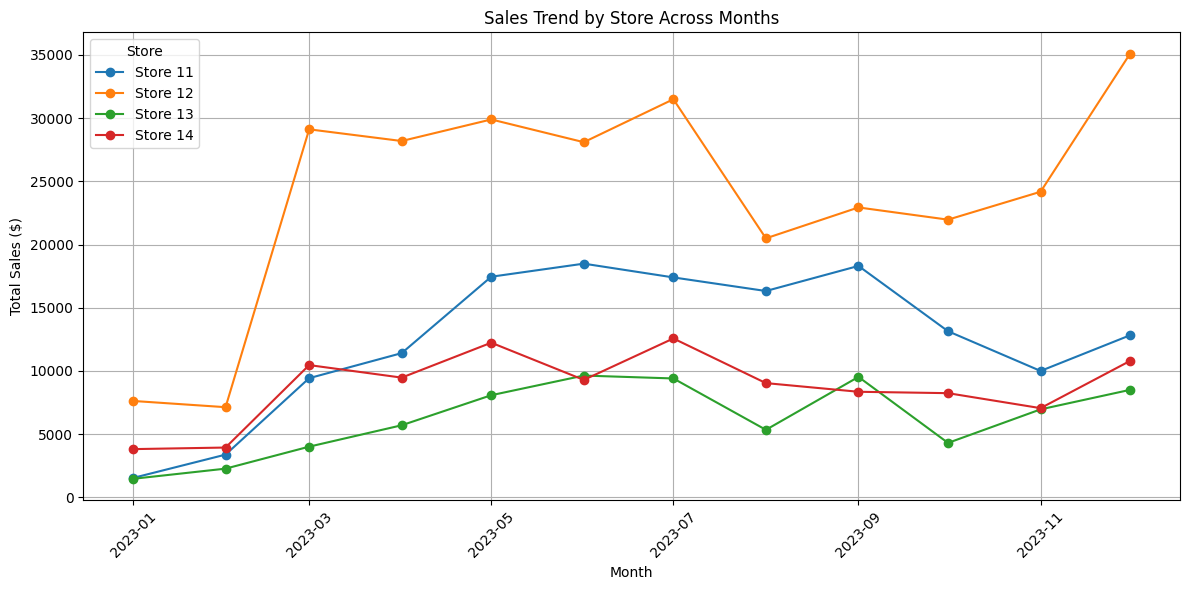

In [ ]:
# Extract month and year for grouping
sales_df['month_year'] = sales_df['sale.date'].dt.to_period('M')  # Year-Month format

# Aggregate sales amount by store and month
store_sales_trend = sales_df.groupby(['store', 'month_year']).agg(total_sales=('sale.amount', 'sum')).reset_index()

# Convert month_year back to datetime for plotting
store_sales_trend['month_year'] = store_sales_trend['month_year'].dt.to_timestamp()

# Pivot the data to have stores as columns for easier plotting
store_sales_pivot = store_sales_trend.pivot(index='month_year', columns='store', values='total_sales')

# Plot sales trend by store
plt.figure(figsize=(12, 6))
for store in store_sales_pivot.columns:
    plt.plot(store_sales_pivot.index, store_sales_pivot[store], marker='o', linestyle='-', label=f'Store {store}')

plt.title('Sales Trend by Store Across Months')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.grid()
plt.xticks(rotation=45)
plt.legend(title='Store', loc='upper left')
plt.tight_layout()
plt.show()


## Gross Margin Summary Based Months, Stores & Categories

In [ ]:
gm_summary = sales_df.groupby('store').agg(
    Total_Sale_Amount=pd.NamedAgg(column='sale.amount', aggfunc='sum'),
    Total_Ext_Cost=pd.NamedAgg(column='ext.cost', aggfunc='sum'),
    Total_Units_Sold=pd.NamedAgg(column='qty', aggfunc='sum')).reset_index()

# Calculate GM_Dollar and GM_Percentage
gm_summary['GM_Dollar'] = gm_summary['Total_Sale_Amount'] - gm_summary['Total_Ext_Cost']
gm_summary['GM_Percentage'] = (gm_summary['Total_Sale_Amount'] - gm_summary['Total_Ext_Cost']) / gm_summary['Total_Sale_Amount']
# View the summary
gm_summary


,store,Total_Sale_Amount,Total_Ext_Cost,Total_Units_Sold,GM_Dollar,GM_Percentage
0,11,149693.35,54441.43,2455,95251.92,0.636314
1,12,286224.74,102062.37,4716,184162.37,0.643419
2,13,75221.12,24540.26,1094,50680.86,0.673758
3,14,105276.93,43655.92,1973,61621.01,0.585323




*   Store 11: High GM dollars, mid GM%
*   Store 12: Highest GM dollars, high GM%
*   Store 13: Lowest GM dollars, highest GM%
*   Store 14: Mid GM dollars, lowest GM%



In [ ]:
gm_summary2 = sales_df.groupby('category').agg(
    Total_Sale_Amount=pd.NamedAgg(column='sale.amount', aggfunc='sum'),
    Total_Ext_Cost=pd.NamedAgg(column='ext.cost', aggfunc='sum'),
    Total_Units_Sold=pd.NamedAgg(column='qty', aggfunc='sum')).reset_index()

# Calculate GM_Dollar and GM_Percentage
gm_summary2['GM_Dollar'] = gm_summary2['Total_Sale_Amount'] - gm_summary2['Total_Ext_Cost']
gm_summary2['GM_Percentage'] = (gm_summary2['Total_Sale_Amount'] - gm_summary2['Total_Ext_Cost']) / gm_summary2['Total_Sale_Amount']
# View the summary
gm_summary2

,category,Total_Sale_Amount,Total_Ext_Cost,Total_Units_Sold,GM_Dollar,GM_Percentage
0,Accessories,45033.53,16930.06,1527,28103.47,0.624057
1,Childrens,27191.00,10036.94,1137,17154.06,0.630873
2,Footwear,204102.96,74701.97,2268,129400.99,0.633999
3,Gifts & Lifestyle,9967.50,4213.47,316,5754.03,0.577279
4,Men's Apparel,103846.60,35795.64,1722,68050.96,0.655303
5,Women's Apparel,226274.55,83021.90,3268,143252.65,0.633092




*   Women's Apparel: Highest GM dollars, moderate GM%
*   Accessories: Low GM dollars, low GM%
*   Childrens: Low GM dollars, moderate GM%
*   Men's Apparel: Moderate GM dollars, highest GM%
*   Footwear: High GM dollars, high GM%
*   Gifts & Lifestyle: Lowest GM dollars, lowest GM%



In [ ]:
sales_df['sale.date'].dt.month
gm_summary3 = sales_df.groupby(sales_df['sale.date'].dt.month).agg(
    Total_Sale_Amount=pd.NamedAgg(column='sale.amount', aggfunc='sum'),
    Total_Ext_Cost=pd.NamedAgg(column='ext.cost', aggfunc='sum'),
    Total_Units_Sold=pd.NamedAgg(column='qty', aggfunc='sum')).reset_index()

# Calculate GM_Dollar and GM_Percentage
gm_summary3['GM_Dollar'] = gm_summary3['Total_Sale_Amount'] - gm_summary3['Total_Ext_Cost']
gm_summary3['GM_Percentage'] = (gm_summary3['Total_Sale_Amount'] - gm_summary3['Total_Ext_Cost']) / gm_summary3['Total_Sale_Amount']
gm_summary3.rename(columns={'sale.date': 'Month'}, inplace=True)
# View the summary
gm_summary3

,Month,Total_Sale_Amount,Total_Ext_Cost,Total_Units_Sold,GM_Dollar,GM_Percentage
0,1,14445.37,6965.33,331,7480.04,0.517816
1,2,16726.78,9741.23,424,6985.55,0.417627
2,3,53017.15,20342.34,952,32674.81,0.616306
3,4,54774.37,17321.18,850,37453.19,0.683772
4,5,67664.81,21662.63,1071,46002.18,0.679854
5,6,65509.70,21862.70,1042,43647.00,0.666268
6,7,70869.90,23106.86,1104,47763.04,0.673954
7,8,51195.21,18113.90,805,33081.31,0.646180
8,9,59124.05,19661.22,846,39462.83,0.667458
9,10,47661.29,16936.42,720,30724.87,0.644650


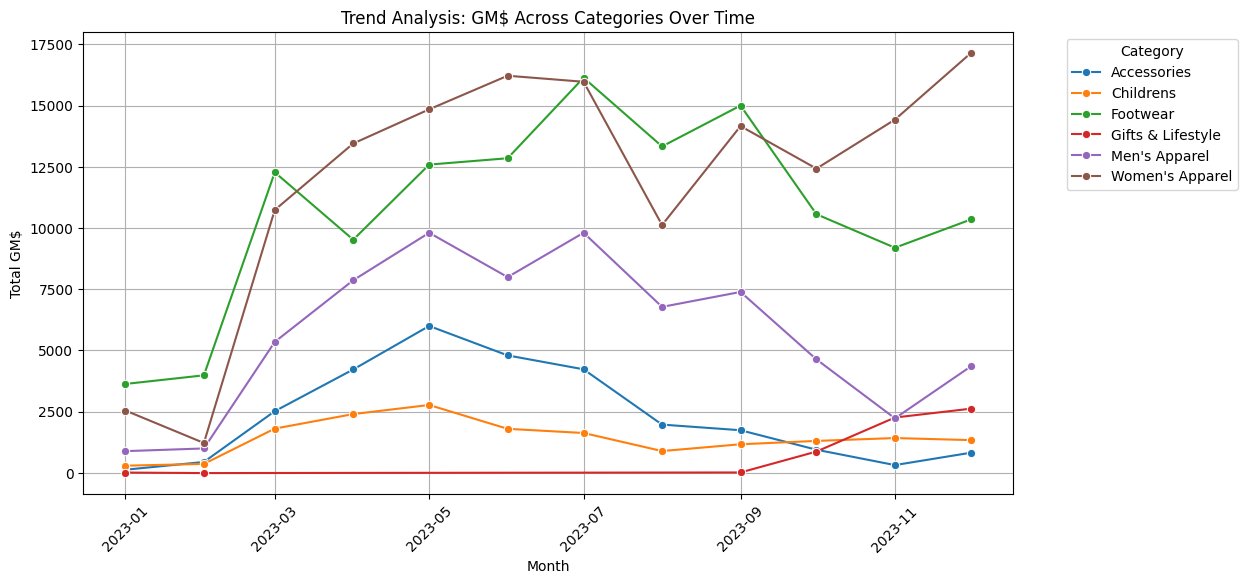

In [ ]:
# Calculate GM$ (Gross Margin $) for each transaction
sales_df['gm_dollars'] = sales_df['sale.amount'] - sales_df['ext.cost']

# Group by month and category to calculate total GM$
category_gm_trend = (
    sales_df.groupby(['month_year', 'category'])
    .agg(total_gm_dollars=('gm_dollars', 'sum'))  # Total GM$ per category per month
    .reset_index()
)

# Convert month_year to datetime for plotting
category_gm_trend['month_year'] = category_gm_trend['month_year'].dt.to_timestamp()

# Plot GM$ trend across categories
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=category_gm_trend,
    x='month_year',
    y='total_gm_dollars',
    hue='category',  # Different lines for each category
    marker='o'
)

plt.title('Trend Analysis: GM$ Across Categories Over Time')
plt.xlabel('Month')
plt.ylabel('Total GM$')
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

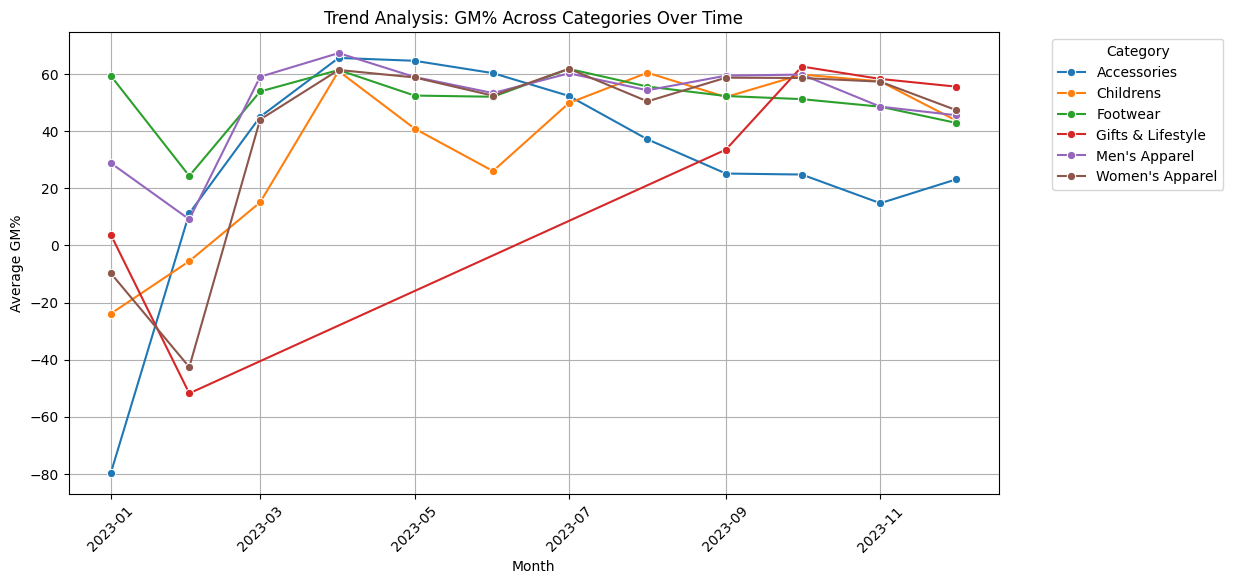

In [ ]:
# Extract month and year
sales_df['month_year'] = sales_df['sale.date'].dt.to_period('M')  # Year-Month format

# Calculate GM% for each transaction
sales_df['gm_percent'] = (sales_df['sale.amount'] - sales_df['ext.cost']) / sales_df['sale.amount'] * 100

# Group by month and category to calculate average GM%
category_gm_percent_trend = (
    sales_df.groupby(['month_year', 'category'])
    .agg(avg_gm_percent=('gm_percent', 'mean'))  # Average GM% per category per month
    .reset_index()
)

# Convert month_year to datetime for plotting
category_gm_percent_trend['month_year'] = category_gm_percent_trend['month_year'].dt.to_timestamp()

# Plot GM% trend across categories
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=category_gm_percent_trend,
    x='month_year',
    y='avg_gm_percent',
    hue='category',
    marker='o'
)

plt.title('Trend Analysis: GM% Across Categories Over Time')
plt.xlabel('Month')
plt.ylabel('Average GM%')
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

## Negative Margin Analysis

In [ ]:
negative_gm = sales_df[sales_df['gross.margin'] < 0]
negative_gm

,store,sale.date,tran.number,sku,category,qty,unit.cost,ext.cost,unit.original.retail,sale.amount,price.category,gross.margin,loyalty.member,customer.id,month_year,gm_dollars,gm_percent
40,11,2023-02-11,23579,2910457,Footwear,1,33.39,33.39,144.0,15.00,Clearance,-1.226000,1,C42334,2023-02,-18.39,-122.600000
41,11,2023-02-11,23580,2910456,Footwear,1,33.39,33.39,144.0,13.50,Clearance,-1.473333,1,C41549,2023-02,-19.89,-147.333333
42,11,2023-02-11,23582,2901354,Women's Apparel,1,27.16,27.16,108.0,11.25,Clearance,-1.414222,0,NaN,2023-02,-15.91,-141.422222
43,11,2023-02-11,23582,2901366,Women's Apparel,1,26.03,26.03,108.0,11.25,Clearance,-1.313778,0,NaN,2023-02,-14.78,-131.377778
44,11,2023-02-11,23582,2911905,Women's Apparel,1,29.92,29.92,108.0,11.25,Clearance,-1.659556,0,NaN,2023-02,-18.67,-165.955556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10165,12,2023-12-24,96077,2969477,Women's Apparel,1,24.73,24.73,108.0,19.37,Clearance,-0.276717,0,NaN,2023-12,-5.36,-27.671657
10166,12,2023-12-24,96079,2958694,Men's Apparel,1,22.66,22.66,101.5,22.22,Clearance,-0.019802,0,NaN,2023-12,-0.44,-1.980198
10168,12,2023-12-24,96085,2936524,Women's Apparel,1,22.50,22.50,99.0,22.46,Clearance,-0.001781,1,C42232,2023-12,-0.04,-0.178094
10169,12,2023-12-24,96086,2936524,Women's Apparel,1,22.50,22.50,99.0,18.38,Clearance,-0.224157,0,NaN,2023-12,-4.12,-22.415669


In [ ]:
negative_gm.groupby('store')['gross.margin'].mean()

,gross.margin
store,
11,-0.531429
12,-0.633026
13,-0.860840
14,-0.898378


In [ ]:
#Percentage of change in price (unit price vs sale.amount)
negative_gm['change_pct'] = (negative_gm['unit.original.retail'] - negative_gm['sale.amount']) / negative_gm['unit.original.retail']
negative_gm = negative_gm[['store', 'category','qty','unit.cost','ext.cost','unit.original.retail','sale.amount','gross.margin','change_pct']]
negative_gm.sort_values(by='change_pct', ascending=False)

<ipython-input-37-f1a8c6f45310>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_gm['change_pct'] = (negative_gm['unit.original.retail'] - negative_gm['sale.amount']) / negative_gm['unit.original.retail']


,store,category,qty,unit.cost,ext.cost,unit.original.retail,sale.amount,gross.margin,change_pct
1464,14,Childrens,1,9.57,9.57,43.5,1.87,-4.117647,0.957011
1444,14,Women's Apparel,1,28.15,28.15,121.5,5.60,-4.026786,0.953909
1453,14,Women's Apparel,1,28.15,28.15,121.5,5.60,-4.026786,0.953909
1507,14,Women's Apparel,1,28.15,28.15,121.5,5.60,-4.026786,0.953909
1428,14,Women's Apparel,1,28.15,28.15,121.5,5.60,-4.026786,0.953909
...,...,...,...,...,...,...,...,...,...
4214,11,Men's Apparel,1,23.62,23.62,66.5,21.45,-0.101166,0.677444
6209,11,Gifts & Lifestyle,1,25.24,25.24,54.0,21.60,-0.168519,0.600000
2011,14,Footwear,2,33.54,67.08,144.0,62.91,-0.066285,0.563125
6771,13,Gifts & Lifestyle,1,25.12,25.12,54.0,25.00,-0.004800,0.537037


## Loyalty Customer Analysis

In [ ]:
loyalty_sales = sales_df.groupby('loyalty.member').agg(
    Total_Sale_Amount=pd.NamedAgg(column='sale.amount', aggfunc='sum'))
loyalty_sales

,Total_Sale_Amount
loyalty.member,
0,323720.72
1,292695.42


# **Part 2: Statistical Inference**

# Hypothesis Testing

In [ ]:
from scipy.stats import ttest_ind, t

print("H₀: 𝜇sale.amount_Winter - 𝜇sale.amount_Summer = 0, Hₐ: 𝜇sale.amount_Winter - 𝜇sale.amount_Summer =/= 0")

# Convert sale.date to datetime
sales_df['sale.date'] = pd.to_datetime(sales_df['sale.date'])

# Extract the month from the date
sales_df['month'] = sales_df['sale.date'].dt.month

# Filter data for Winter and Summer
winter_sale_amount = sales_df[sales_df['month'].isin([10, 11, 12])]['sale.amount']
summer_sale_amount = sales_df[sales_df['month'].isin([5, 6, 7])]['sale.amount']

# Descriptive Statistics
winter_mean = winter_sale_amount.mean()
summer_mean = summer_sale_amount.mean()
print(f"Winter Mean: {winter_mean:.2f}, Summer Mean: {summer_mean:.2f}")
# T critical value:
df = len(winter_sale_amount) + len(summer_sale_amount) - 2
t_critical = t.ppf(1 - 0.05, df)

print(f"Degree of Freedom: {df} | alpha = 0.05 ")
print(f"T-Critical Value: {t_critical}")

# Perform a two-sample t-test (assuming unequal variances)
t_stat, p_value = stats.ttest_ind(winter_sale_amount, summer_sale_amount, equal_var=False)

# Print T-Test Results
print(f"T-Test: T-Statistic = {t_stat:.4f}, p-value = {p_value:.4f}")


# Interpretation

if p_value < 0.05:
    print("Conclusion: Reject null hypothesis. There is sufficient evidence to conclude that the the average sale amount per unit of Winter is different than that in Summer.")
else:
    print("Conclusion: Do not reject null hypothesis.There is not sufficient evidence to conclude that the average sale amount per unit of Winter is different than that in Summer.")

H₀: 𝜇sale.amount_Winter - 𝜇sale.amount_Summer = 0, Hₐ: 𝜇sale.amount_Winter - 𝜇sale.amount_Summer =/= 0
Winter Mean: 58.29, Summer Mean: 63.96
Degree of Freedom: 5986 | alpha = 0.05 
T-Critical Value: 1.6451082220782849
T-Test: T-Statistic = -6.1786, p-value = 0.0000
Conclusion: Reject null hypothesis. There is sufficient evidence to conclude that the the average sale amount per unit of Winter is different than that in Summer.


# Regression Analysis

In [ ]:
#Rearranging category order to set "Women's Apparel" as reference category in regression models
sales_df['category'] = sales_df['category'].astype('category')
sales_df['category'] = sales_df['category'].cat.reorder_categories(["Women's Apparel", "Accessories","Gifts & Lifestyle", "Childrens","Men's Apparel","Footwear"], ordered=False)

In [ ]:
#Import stores dataset
stores = pd.read_csv("stores.csv")
stores.drop(columns=['Unnamed: 5','Unnamed: 6','Unnamed: 7'], inplace=True)
stores

,store,city,state,sqft,store.tier
0,11,Burlington,MA,2331,2
1,12,Watertown,MA,2650,1
2,13,Rockport,MA,1425,3
3,14,Manchester,NH,2060,2


In [ ]:
regression_data = sales_df[['gross.margin','store','sale.date','loyalty.member','ext.cost','qty', 'category','unit.original.retail','price.category']]


regression_data['seasonality_Holiday'] = regression_data['sale.date'].dt.month.isin([10, 11, 12]).astype(int)
#Creating Dummy Variables
regression_data = regression_data.merge(stores[['store', 'store.tier']], on='store', how='left')
#Dropping store to prevent dummy trap
regression_data.drop(['store'], axis=1, inplace=True)
regression_data['high_price_items'] = regression_data.apply(lambda row: 1 if row['category'] in ['Footwear',"Men's Apparel","Women's Apparel"] else 0, axis=1)

regression_data = pd.get_dummies(regression_data, columns=['category','store.tier'], drop_first=True)

# Convert boolean columns to integers
bool_columns = regression_data.select_dtypes(include=['bool']).columns
regression_data[bool_columns] = regression_data[bool_columns].astype(int)



# Create interaction terms
regression_data['high_price_items_store2_int'] = regression_data['high_price_items'] * regression_data['store.tier_2']
regression_data['high_price_items_store3_int'] = regression_data['high_price_items'] * regression_data['store.tier_3']

# Set a seed for reproducibility
np.random.seed(124)
def calculate_discount(row):
    if row['price.category'] == 'Clearance' or row['price.category'] == 'Markdown':
        return 0
    else:
        # Assuming a random discount between the specified percentages
        return np.random.uniform(0.05, 0.75,size=1)[0]
# Apply the discount calculation function to each row
regression_data['discount_percentage'] = regression_data.apply(calculate_discount, axis=1)
regression_data['discount_bin'] = regression_data['discount_percentage'].apply(lambda x: 1 if x > 0.05 else 0)
regression_data['discount_amount'] = regression_data['discount_percentage'] * regression_data['unit.original.retail']

# Create an interaction term between discount percentage and quantity sold
regression_data['discount_amount_qty_interaction'] = regression_data['discount_amount'] * regression_data['qty']
regression_data['seasonality_Holiday_discount_interaction'] = regression_data['seasonality_Holiday'] * regression_data['discount_bin']

# Define predictors and response variable
X = regression_data.drop(['gross.margin','discount_bin','high_price_items','seasonality_Holiday','discount_amount','discount_percentage',
                          'unit.original.retail','price.category'], axis=1)
y = regression_data['gross.margin']

# Ensure all columns in X are numeric
X = X.select_dtypes(include=['number'])

# Add intercept
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

<ipython-input-42-2d8023bc9f18>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regression_data['seasonality_Holiday'] = regression_data['sale.date'].dt.month.isin([10, 11, 12]).astype(int)


                            OLS Regression Results                            
Dep. Variable:           gross.margin   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     153.4
Date:                Tue, 10 Dec 2024   Prob (F-statistic):               0.00
Time:                        01:29:40   Log-Likelihood:                -6139.6
No. Observations:               10172   AIC:                         1.231e+04
Df Residuals:                   10157   BIC:                         1.242e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------